In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

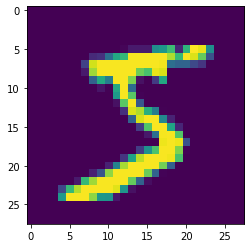

In [6]:
plt.imshow(X_train[0])
#plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train_flatten = X_train.reshape(len(X_train),X_train.shape[1]*X_train.shape[2])/255
X_train_flatten.shape

(60000, 784)

In [10]:
X_test_flatten = X_test.reshape(len(X_test),X_test.shape[1]*X_test.shape[2])/255
X_test_flatten.shape

(10000, 784)

In [11]:
model = Sequential([
    Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4673 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9257


In [12]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2661 - accuracy: 0.9255


[0.2661024034023285, 0.9254999756813049]

In [13]:
predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 838us/step


predicted class : 7


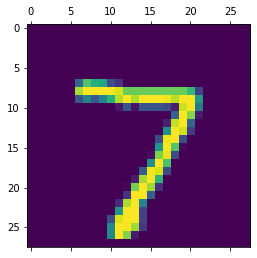

In [14]:
index = 0
plt.matshow(X_test[index])
print("predicted class : {}".format(np.argmax(predicted[index])))

Text(87.0, 0.5, 'True label')

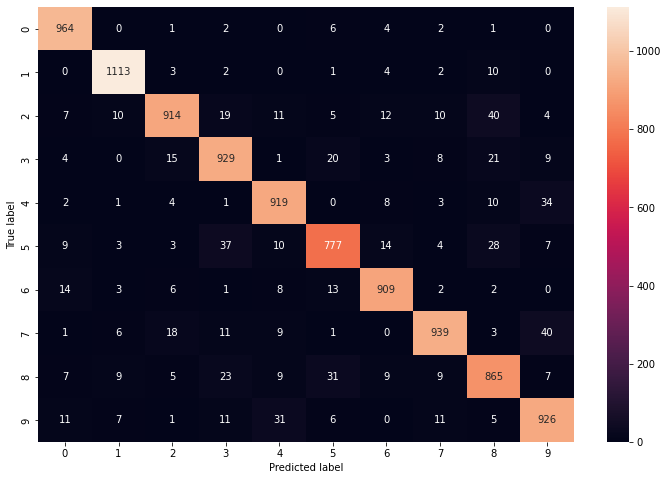

In [15]:
import seaborn as sn

predicted_labels = [np.argmax(i) for i in predicted]
cm=tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)

plt.figure(figsize=(12,8))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [16]:
model_up = Sequential([
    Dense(100,input_shape=(784,),activation='relu'),
    Dense(10,activation='sigmoid')
])

model_up.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_up.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1218 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0861 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0651 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0511 - accuracy: 0.9848


In [17]:
model_flat = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100,activation='relu'),
    Dense(10,activation='sigmoid')
])

model_flat.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_flat.fit(X_train/255,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2763 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1262 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0869 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0664 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9841
